In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
churn_data = pd.read_csv('datasets/Churn_Modelling.csv')
churn_data.head()



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
columns = churn_data.columns.tolist()
print(columns)

['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [5]:
rows, columns = churn_data.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 10000
Number of columns: 14


In [6]:
clean_churn_data = churn_data.drop(columns=['RowNumber','CustomerId','Surname'])
clean_churn_data = clean_churn_data.dropna()
clean_churn_data = clean_churn_data.drop_duplicates()
clean_churn_data.head()



,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
rows, columns = clean_churn_data.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 10000
Number of columns: 11


In [8]:
# Identify numerical columns
numerical_cols = ['Balance', 'EstimatedSalary', 'CreditScore', 'Age']

# Normalize the numerical columns
scaler = StandardScaler()
clean_churn_data[numerical_cols] = scaler.fit_transform(clean_churn_data[numerical_cols])
clean_churn_data.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,France,Female,0.293517,2,-1.225848,1,1,1,0.021886,1
1,-0.440036,Spain,Female,0.198164,1,0.117350,1,0,1,0.216534,0
2,-1.536794,France,Female,0.293517,8,1.333053,3,1,0,0.240687,1
3,0.501521,France,Female,0.007457,1,-1.225848,2,0,0,-0.108918,0
4,2.063884,Spain,Female,0.388871,2,0.785728,1,1,1,-0.365276,0


In [9]:
label_encoder = LabelEncoder()

for column in clean_churn_data.select_dtypes(include=['object']).columns:
    clean_churn_data[column] = label_encoder.fit_transform(clean_churn_data[column])

clean_churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,0,0,0.293517,2,-1.225848,1,1,1,0.021886,1
1,-0.440036,2,0,0.198164,1,0.117350,1,0,1,0.216534,0
2,-1.536794,0,0,0.293517,8,1.333053,3,1,0,0.240687,1
3,0.501521,0,0,0.007457,1,-1.225848,2,0,0,-0.108918,0
4,2.063884,2,0,0.388871,2,0.785728,1,1,1,-0.365276,0


In [10]:
X = clean_churn_data.drop(columns=['Exited'])
y = clean_churn_data['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
value_counts = clean_churn_data['Exited'].value_counts()
print(f"Unique values in Exited column: {value_counts}")

Unique values in Exited column: Exited
0    7963
1    2037
Name: count, dtype: int64


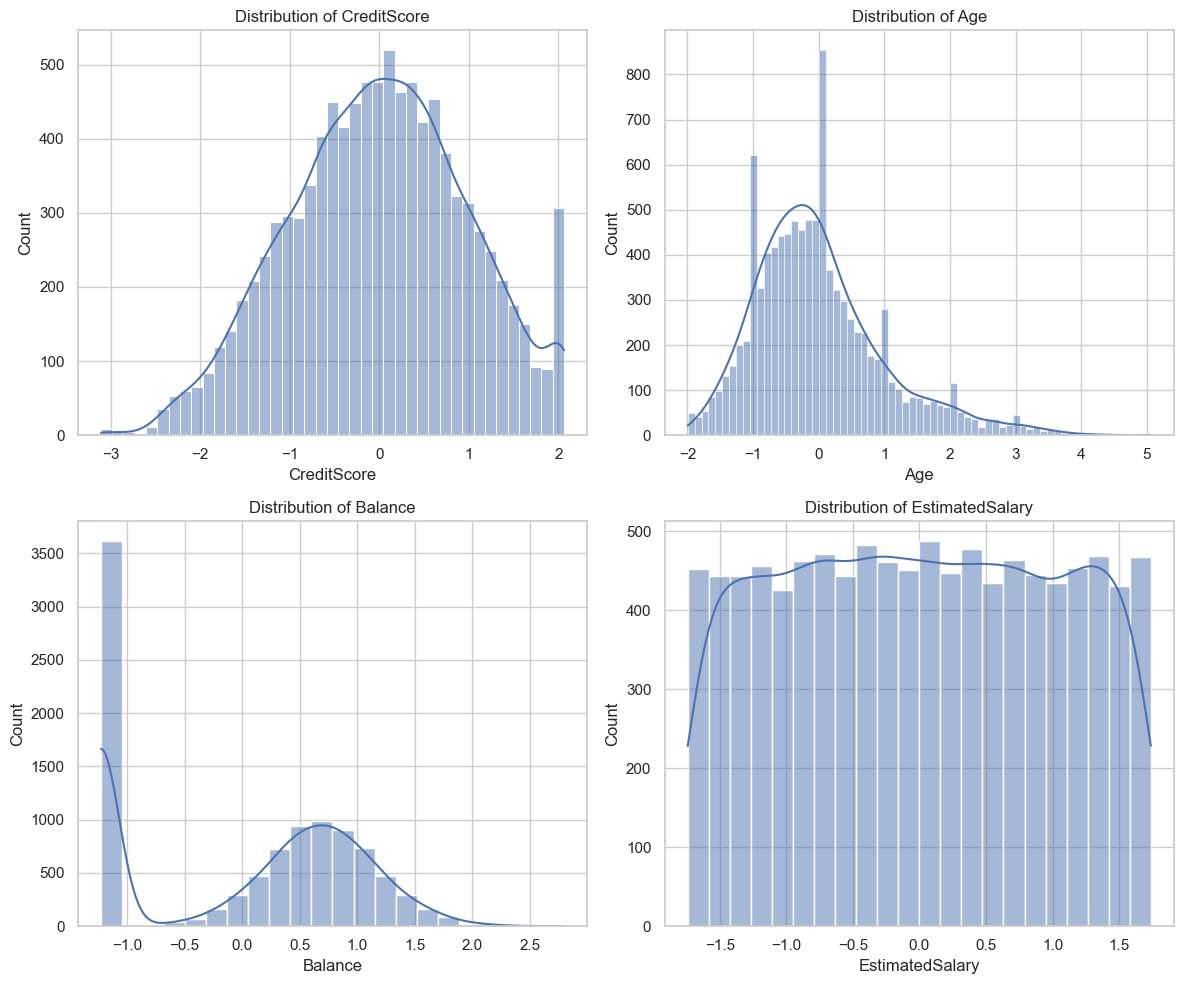

In [12]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Define the numerical columns to visualize
numerical_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Create a figure with a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through each column and create a plot
for i, column in enumerate(numerical_cols):
    if clean_churn_data[column].dtype in ['float64', 'int64']:
        # Numerical columns: Histogram and KDE plot
        sns.histplot(clean_churn_data[column], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
    else:
        # Categorical columns: Bar plot
        sns.countplot(x=clean_churn_data[column], ax=axes[i])
        axes[i].set_title(f'Count of {column}')


# Adjust layout
plt.tight_layout()
plt.show()

In [13]:
gnb = GaussianNB()

In [14]:
k_values = list(range(2, 21))  # k values from 2 to 20
mean_scores = []

# Cross-validation to evaluate performance for each k
for k in k_values:
    cv_scores = cross_val_score(gnb, X, y, cv=k)
    mean_scores.append(cv_scores.mean())
    print(f"Mean accuracy for k={k}: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

# Select the best k (the one with the highest mean accuracy)
best_k = k_values[mean_scores.index(max(mean_scores))]
print(f"\nBest k-value based on mean accuracy: k={best_k}")

# Perform k-fold cross-validation with the best k-value
cv_scores_best_k = cross_val_score(gnb, X, y, cv=best_k)

# Report cross-validation results for the best k
print(f"\nCross-validation results using best k={best_k}:")
print(f"Mean accuracy: {cv_scores_best_k.mean():.4f} (+/- {cv_scores_best_k.std():.4f})")


Mean accuracy for k=2: 0.8281 (+/- 0.0035)
Mean accuracy for k=3: 0.8275 (+/- 0.0045)
Mean accuracy for k=4: 0.8275 (+/- 0.0030)
Mean accuracy for k=5: 0.8283 (+/- 0.0048)
Mean accuracy for k=6: 0.8276 (+/- 0.0076)
Mean accuracy for k=7: 0.8284 (+/- 0.0068)
Mean accuracy for k=8: 0.8270 (+/- 0.0082)
Mean accuracy for k=9: 0.8275 (+/- 0.0102)
Mean accuracy for k=10: 0.8276 (+/- 0.0082)
Mean accuracy for k=11: 0.8288 (+/- 0.0071)
Mean accuracy for k=12: 0.8273 (+/- 0.0106)
Mean accuracy for k=13: 0.8280 (+/- 0.0086)
Mean accuracy for k=14: 0.8281 (+/- 0.0091)
Mean accuracy for k=15: 0.8280 (+/- 0.0107)
Mean accuracy for k=16: 0.8280 (+/- 0.0104)
Mean accuracy for k=17: 0.8282 (+/- 0.0090)
Mean accuracy for k=18: 0.8285 (+/- 0.0109)
Mean accuracy for k=19: 0.8279 (+/- 0.0104)
Mean accuracy for k=20: 0.8279 (+/- 0.0094)

Best k-value based on mean accuracy: k=11

Cross-validation results using best k=11:
Mean accuracy: 0.8288 (+/- 0.0071)


In [15]:

gnb.fit(X_train, y_train)

# Make predictions and evaluate the Gaussian Naïve Bayes model
y_pred_gnb = gnb.predict(X_test)
y_pred_prob_gnb = gnb.predict_proba(X_test)[:, 1]
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
class_report_gnb = classification_report(y_test, y_pred_gnb)
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_pred_prob_gnb)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)


In [16]:
print(f"Gaussian Naïve Bayes Accuracy: {accuracy_gnb}")


Gaussian Naïve Bayes Accuracy: 0.8285


In [17]:
print("Gaussian Naïve Bayes Confusion Matrix:")
print(conf_matrix_gnb)


Gaussian Naïve Bayes Confusion Matrix:
[[1563   44]
 [ 299   94]]


In [18]:
print("Gaussian Naïve Bayes Classification Report:")
print(class_report_gnb)


Gaussian Naïve Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1607
           1       0.68      0.24      0.35       393

    accuracy                           0.83      2000
   macro avg       0.76      0.61      0.63      2000
weighted avg       0.81      0.83      0.79      2000



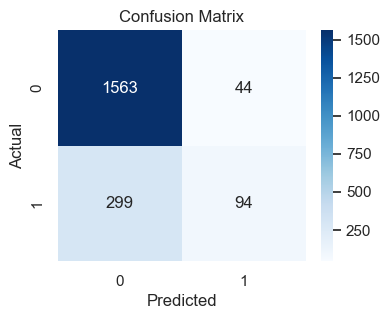

In [19]:
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_gnb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

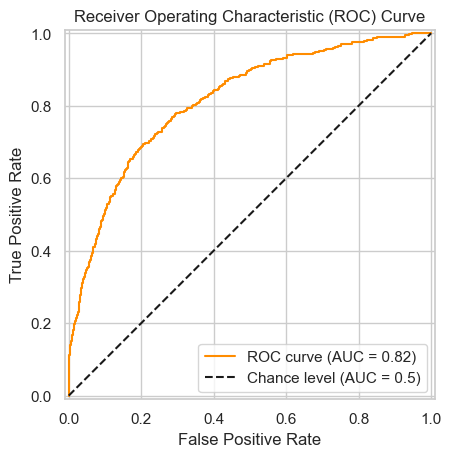

In [20]:
display = RocCurveDisplay.from_predictions(
    y_test,
    y_pred_prob_gnb,
    name="ROC curve",
    color="darkorange",
    plot_chance_level=True,
)

_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Receiver Operating Characteristic (ROC) Curve",
)

plt.show()